In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from neuralNetworkClass import neuralNetwork
from fama_french_analysis import *
import statsmodels.api as sm

In [ ]:
stock_list = extract_fama_french_data_frames()  # DataFrame where each entry is a DataFrame for a stock
FF_data = load_FAMA_FRENCH_Factor_data()       # Not used directly in this snippet

# Slice to only the first 10 stocks for testing
stocks_list = stock_list[:10]

fama_french_predictions = []  # Use plural for clarity

# Iterate over the list of DataFrames
for i, stock_data in enumerate(stock_list):  # Use enumerate to track index if needed
    # Split stock data into train and test sets
    train, test = famaFrenchDataMerge(stock_data, 20191231)  # Pass the DataFrame directly
    # Train Fama-French model and make predictions

    if train.empty:
        print(f"Training data for stock {i} is empty. Skipping...")
        continue  # Skip to the next stock if no data prior to 2020

    ff_model = ff_train(train)
    predictions = ff_test(test, ff_model)
    
    # Create a DataFrame to hold the results for this stock
    stock_prediction = test[["date", "PERMNO", "TICKER","XR"]].copy()
    stock_prediction["FF_prediction"] = predictions
    stock_prediction["stock_number"] = i  # Optionally track the stock number
    
    # Append to the list of predictions
    fama_french_predictions.append(stock_prediction)

# Combine all predictions into a single DataFrame
fama_french_predictions_df = pd.concat(fama_french_predictions, ignore_index=True)

# Save the results to a CSV file
fama_french_predictions_df.to_csv('data/predictions/fama_french_predictions.csv', index=False)

Training data for stock 608 is empty. Skipping...


In [ ]:
# Load dataset
df = pd.read_csv('data/Neural_Network_Data.csv')


In [ ]:
#Final feature engineering
df["BtoM"] = df["book_value"] / df["m_cap"]
df['log_m_cap'] = np.log(df['m_cap'])

print(df.shape[0]) #N_rows
df.head()

15644180


,date,PERMNO,TICKER,m_cap,book_value,RET,Mkt-RF,RF,XR,BtoM,log_m_cap
0,19870930,10026,JJSF,63575250.0,15194000.0,0.011628,0.18,0.021,-0.009372,0.238992,17.967735
1,19871001,10026,JJSF,64306000.0,15194000.0,0.011494,1.43,0.027,-0.015506,0.236277,17.979163
2,19871002,10026,JJSF,65036750.0,15194000.0,0.011364,0.30,0.027,-0.015636,0.233622,17.990463
3,19871005,10026,JJSF,65036750.0,15194000.0,0.000000,0.05,0.027,-0.027000,0.233622,17.990463
4,19871006,10026,JJSF,65036750.0,15194000.0,0.000000,-2.24,0.027,-0.027000,0.233622,17.990463


In [ ]:
train_data = df[df['date'] <= 20191231]
test_data = df[df['date'] > 20191231]

test_data.head()

,date,PERMNO,TICKER,m_cap,book_value,RET,Mkt-RF,RF,XR,BtoM,log_m_cap
8129,20200102,10026,JJSF,3.433752e+09,833751000.0,-0.014056,0.86,0.006,-0.020056,0.242811,21.956919
8130,20200103,10026,JJSF,3.494799e+09,833751000.0,0.017779,-0.67,0.006,0.011779,0.238569,21.974542
8131,20200106,10026,JJSF,3.497823e+09,833751000.0,0.000865,0.36,0.006,-0.005135,0.238363,21.975407
8132,20200107,10026,JJSF,3.459267e+09,833751000.0,-0.011023,-0.19,0.006,-0.017023,0.241020,21.964323
8133,20200108,10026,JJSF,3.440556e+09,833751000.0,-0.005409,0.47,0.006,-0.011409,0.242330,21.958899


In [ ]:
# Define features and target
features = ['log_m_cap', 'Mkt-RF', 'BtoM']
target = 'XR'

X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# Initialize the model
model = neuralNetwork(input_dim=X_train.shape[1])

# Preprocess the data
X_train_scaled, X_test_scaled = model.preprocess_data(X_train, X_test)

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

/Users/nikolauswieland/thesis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 40s 495us/step - loss: 0.8532 - mae: 0.5691 - val_loss: 1.1197 - val_mae: 0.5951
Epoch 2/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 40s 496us/step - loss: 0.8503 - mae: 0.5684 - val_loss: 1.1271 - val_mae: 0.6039
Epoch 3/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 40s 507us/step - loss: 0.8482 - mae: 0.5685 - val_loss: 1.1382 - val_mae: 0.6136
Epoch 4/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 39s 489us/step - loss: 0.8717 - mae: 0.5690 - val_loss: 1.1414 - val_mae: 0.6138
Epoch 5/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 39s 493us/step - loss: 0.8581 - mae: 0.5687 - val_loss: 1.1248 - val_mae: 0.6025
Epoch 6/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 39s 485us/step - loss: 0.8598 - mae: 0.5689 - val_loss: 1.1524 - val_mae: 0.6213
Epoch 7/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 39s 487us/step - loss: 0.8558 - mae: 0.5683 - val_loss: 1.1432 - val_mae: 0.6167
Epoch 8/50
79400/79400 ━━━━━━━━━━━━━━━━━━━━ 39s 492us/step - loss: 0.8517 - mae: 0.5686 - val_loss: 1.1450 - val_mae: 0.6163


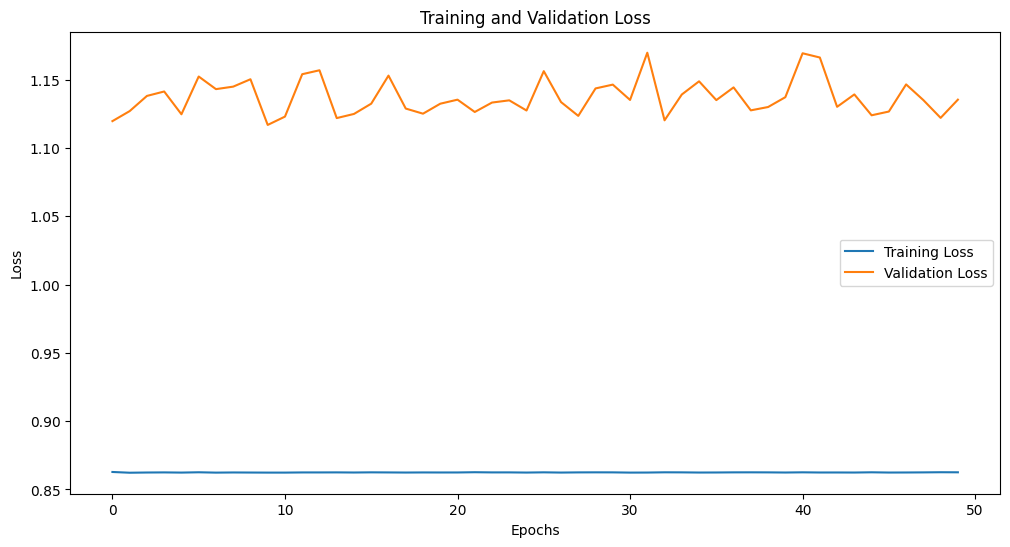

91884/91884 ━━━━━━━━━━━━━━━━━━━━ 25s 267us/step - loss: 0.1375 - mae: 0.2580
Test Loss: 0.13645853102207184, Test MAE: 0.25813424587249756
91884/91884 ━━━━━━━━━━━━━━━━━━━━ 17s 190us/step


/var/folders/9r/b_dv9lwd6bgcw3jq48k4ncj80000gn/T/ipykernel_39142/1261177497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['NN_Predictions'] = predictions_original


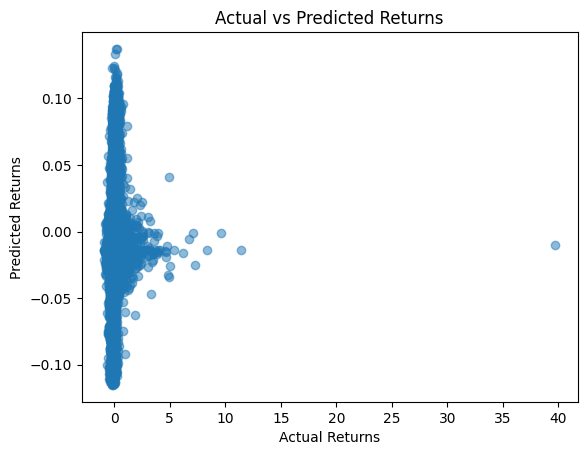

In [ ]:
# Train the model
history = model.train(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=50, batch_size=64)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict on test data
predictions = model.predict(X_test_scaled)
predictions_original = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Optional: Save predictions to a CSV
test_data['NN_Predictions'] = predictions_original
test_data.to_csv('data/predictions/nn_predictions.csv', index=False)

# Visualize actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions_original, alpha=0.5)
plt.title('Actual vs Predicted Returns')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.show()


In [ ]:
nn_predictions = pd.read_csv('data/predictions/nn_predictions.csv')
ff_predictions = pd.read_csv('data/predictions/fama_french_predictions.csv')


merged_df = pd.merge(
    nn_predictions[['date', 'PERMNO', 'TICKER', 'XR', 'NN_Predictions']],  
    ff_predictions[['date', 'PERMNO', 'FF_prediction']],                
    on=['date', 'PERMNO'],                                    
    how='inner'                                             
)

In [ ]:
# Calculate errrprs
merged_df['NN_Residuals'] = merged_df['XR'] - merged_df['NN_Predictions']
merged_df['FF_Residuals'] = merged_df['XR'] - merged_df['FF_prediction']

#Abs errors
merged_df['NN_Abs_Residuals'] = merged_df['NN_Residuals'].abs()
merged_df['FF_Abs_Residuals'] = merged_df['FF_Residuals'].abs()

#MAE
nn_mae = merged_df['NN_Abs_Residuals'].mean()
ff_mae = merged_df['FF_Abs_Residuals'].mean()
print(f"Mean Absolute Error for NN Predictions: {nn_mae}")
print(f"Mean Absolute Error for FF Predictions: {ff_mae}")

#MSE
mean_squared_error_nn = (merged_df['NN_Residuals'] ** 2).mean()
mean_squared_error_ff = (merged_df['FF_Residuals'] ** 2).mean()
print(f"Mean Squared Error for NN Predictions: {mean_squared_error_nn}")
print(f"Mean Squared Error for FF Predictions: {mean_squared_error_ff}")

Mean Absolute Error for NN Predictions: 0.02423347111999867
Mean Absolute Error for FF Predictions: 0.02376337356143667
Mean Squared Error for NN Predictions: 0.0026031739356189012
Mean Squared Error for FF Predictions: 0.0025754227280494063


In [ ]:
count_nn_greater_ff = (merged_df['NN_Abs_Residuals'] > merged_df['FF_Abs_Residuals']).sum()
count_ff_greater_nn = (merged_df['FF_Abs_Residuals'] > merged_df['NN_Abs_Residuals']).sum()

print(f"NN_Abs_Residuals > FF_Abs_Residuals: {count_nn_greater_ff}")
print(f"FF_Abs_Residuals > NN_Abs_Residuals: {count_ff_greater_nn}")

NN_Abs_Residuals > FF_Abs_Residuals: 1395000
FF_Abs_Residuals > NN_Abs_Residuals: 1329346
